In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
df= pd.read_csv(r"/content/insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.corr()

<ipython-input-97-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<ipython-input-98-ed26d50ea9b3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  a=df.corr()


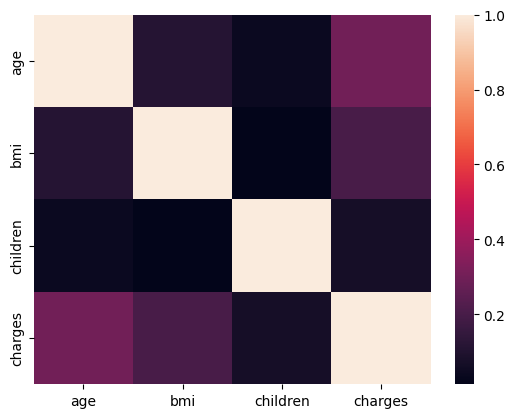

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
a=df.corr()
sns.heatmap(a)
plt.show()

<Axes: xlabel='age', ylabel='bmi'>

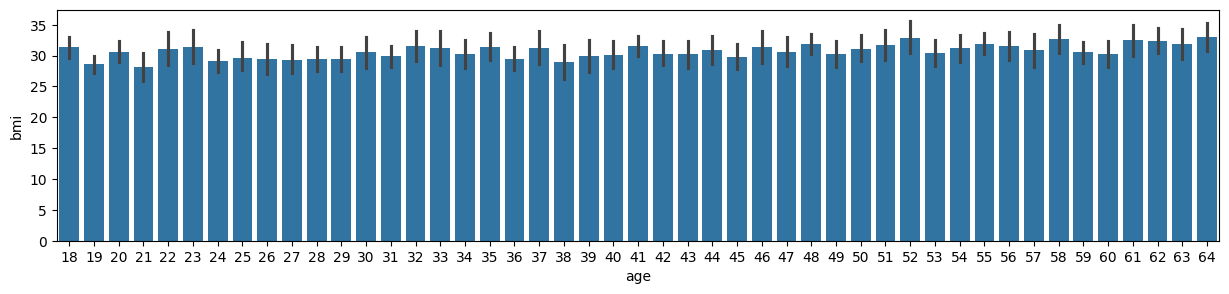

In [ ]:
plt.figure(figsize=(15,3))
sns.barplot(x=df['age'],y=df['bmi'])

<Axes: xlabel='sex', ylabel='bmi'>

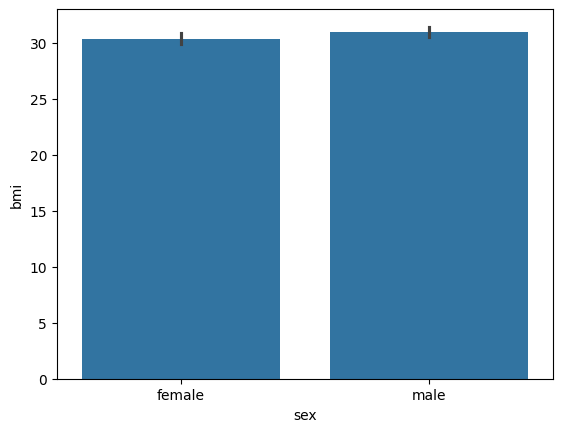

In [ ]:
sns.barplot(x=df['sex'],y=df['bmi'])

<Axes: xlabel='children', ylabel='bmi'>

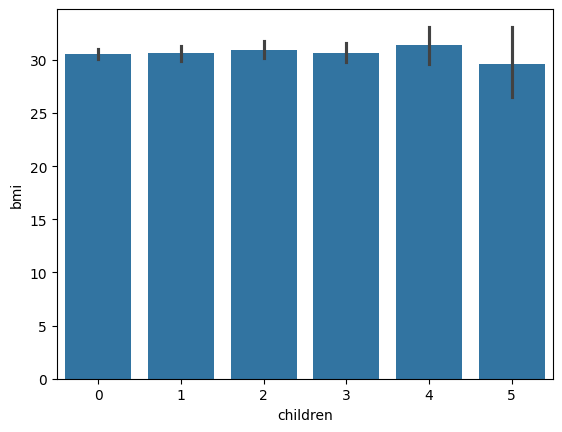

In [ ]:
sns.barplot(x=df['children'],y=df['bmi'])

<Axes: xlabel='smoker', ylabel='bmi'>

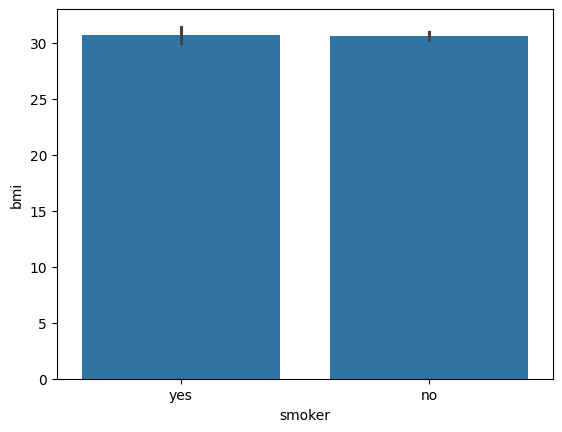

In [ ]:
sns.barplot(x=df['smoker'],y=df['bmi'])

<Axes: xlabel='region', ylabel='bmi'>

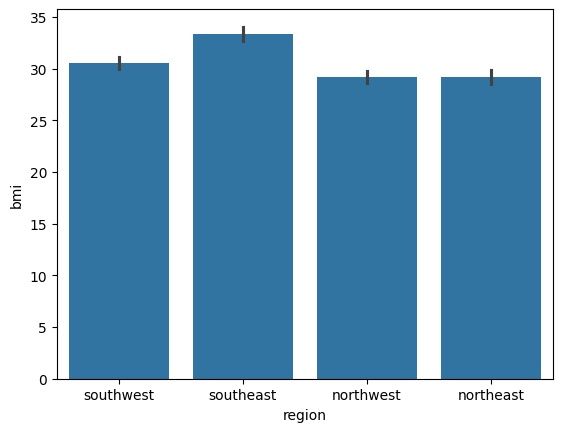

In [ ]:
sns.barplot(x=df['region'],y=df['bmi'])

<Axes: xlabel='charges', ylabel='bmi'>

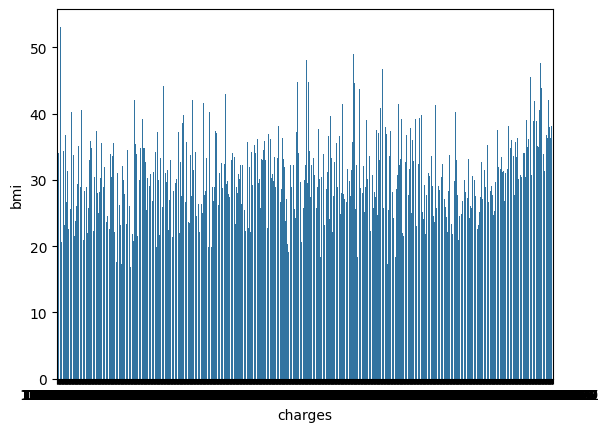

In [ ]:
sns.barplot(x=df['charges'],y=df['bmi'])

In [ ]:
df['children'].corr(df['charges'])

0.0679982268479048

In [ ]:
df['age'].corr(df['charges'])

0.29900819333064754

In [ ]:
df['bmi'].corr(df['charges'])

0.19834096883362895

In [ ]:
df=df.drop('children',axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      1338 non-null   int64  
 1   sex      1338 non-null   object 
 2   bmi      1338 non-null   float64
 3   smoker   1338 non-null   object 
 4   region   1338 non-null   object 
 5   charges  1338 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 62.8+ KB


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
s={'female':0,'male':1}

In [ ]:
df['sex']=df['sex'].map(s)

In [ ]:
df['smoker'].unique()


array(['yes', 'no'], dtype=object)

In [ ]:
d={'yes':0,'no':1}

In [ ]:
df['smoker']=df['smoker'].map(d)

In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
f={'southeast':0,'northwest':1,'northeast':2,'southwest':3}

In [ ]:
df['region']=df['region'].map(f)

In [ ]:
  df.head()

,age,sex,bmi,smoker,region,charges
0,19,0,27.900,0,3,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,1,0,4449.46200
3,33,1,22.705,1,1,21984.47061
4,32,1,28.880,1,1,3866.85520


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
y=df['charges']
x=df.drop('charges',axis=1)
x

,age,sex,bmi,smoker,region
0,19,0,27.900,0,3
1,18,1,33.770,1,0
2,28,1,33.000,1,0
3,33,1,22.705,1,1
4,32,1,28.880,1,1
...,...,...,...,...,...
1333,50,1,30.970,1,1
1334,18,0,31.920,1,2
1335,18,0,36.850,1,0
1336,21,0,25.800,1,3


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
prediction=model.predict(x_test)
prediction

array([ 7760.6265872 ,  2392.3526235 , 20108.3755246 ,  6483.4033722 ,
       21592.1308558 ,  4670.9286507 ,  9337.6177446 , 11295.5151456 ,
        6166.0902647 ,  3277.9389665 , 38726.6884041 , 20756.401983  ,
        8216.771438  ,  4516.8238348 , 11241.9891983 ,  6809.1015277 ,
        3534.6166365 , 12360.2859525 ,  3089.2744865 , 14539.491809  ,
       47565.9231892 , 10743.6004656 ,  8507.1187133 ,  7673.85370673,
        8407.8366972 , 17389.1128369 ,  9286.7639031 , 18031.111979  ,
        4262.0110585 ,  1797.3379055 ,  6910.1228108 , 33819.0153098 ,
       14270.785156  , 12402.0304961 ,  8249.1482788 , 11544.6254131 ,
       13601.8557821 , 12057.6679931 , 11724.6965905 , 11784.0341095 ,
       13348.0248395 , 20359.5695752 , 19334.0205432 ,  4789.5438836 ,
        2751.1380033 ,  7735.3696145 , 11038.68582   , 19055.6860394 ,
       14791.2324286 , 10294.9848395 ,  2748.3805873 , 35339.4323027 ,
       24593.8752057 , 12423.037757  ,  3793.5349018 , 19818.7140189 ,
      

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,prediction)
print("Mean Squared Error.",mse)

Mean Squared Error. 28923030.613869965


In [ ]:
new_data=pd.DataFrame({'age':[35],'sex':[0],'bmi':[27],'smoker':[1],'region':[2]})
predict=model.predict(new_data)
predict

array([6210.0161585])